# Mask Use Rates Video

This notebook will attempt to create a simple graphic comparing current new infection rates to survey results for mask usage.  The graph will then be changed into a video showing change over time.

[Most Recent Video](https://youtu.be/pAnK_I578PA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
maskusage_df = pd.read_csv('./covid-19-data/mask-use/mask-use-by-county.csv')
#select for louisiana
maskusage_df = maskusage_df[np.logical_and(maskusage_df['COUNTYFP'] >= 22000, maskusage_df['COUNTYFP'] < 23000)]
maskusage_df.index = maskusage_df['COUNTYFP']
maskusage_df.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
COUNTYFP,,,,,,
22001,22001,0.122,0.111,0.138,0.265,0.362
22003,22003,0.196,0.070,0.118,0.200,0.416
22005,22005,0.049,0.092,0.142,0.148,0.569
22007,22007,0.079,0.034,0.213,0.206,0.468
22009,22009,0.130,0.092,0.073,0.246,0.459


In [3]:
maskusage_df.describe()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,22064.000000,0.082328,0.072453,0.114406,0.207156,0.523656
std,37.237973,0.042473,0.029640,0.037840,0.054793,0.083430
min,22001.000000,0.019000,0.020000,0.027000,0.061000,0.354000
25%,22032.500000,0.060750,0.047500,0.088500,0.173500,0.462500
50%,22064.000000,0.076000,0.071000,0.112500,0.207500,0.521500
75%,22095.500000,0.102000,0.092000,0.138000,0.241250,0.577500
max,22127.000000,0.249000,0.142000,0.213000,0.366000,0.685000


In [4]:
ladh_df = pd.read_excel('./LaDeptHealth/LA_COVID_TESTBYDAY_PARISH_PUBLICUSE.xlsx')
ladh_df = ladh_df[['datetime','Parish','Daily Case Count']]
ladh_df.index = ladh_df['Parish'] + ' Parish'
ladh_df.head(2)

,datetime,Parish,Daily Case Count
Parish,,,
Acadia Parish,2020-03-01 12:00:00,Acadia,0
Acadia Parish,2020-03-02 12:00:00,Acadia,0


In [5]:
pop_df = pd.read_csv('./uscensus/co-est2019-alldata.csv',encoding='latin1')
pop_df = pop_df[pop_df['STATE'] == 22]
pop_df.index = pop_df['STATE'] * 1000 + pop_df['COUNTY']
pop_df['COUNTYFP'] = pop_df.index
pop_df = pop_df[['STNAME','CTYNAME','POPESTIMATE2019']]
pop_df.head(2)

,STNAME,CTYNAME,POPESTIMATE2019
22000,Louisiana,Louisiana,4648794
22001,Louisiana,Acadia Parish,62045


In [6]:
pop_df.loc[22071]

STNAME                  Louisiana
CTYNAME            Orleans Parish
POPESTIMATE2019            390144
Name: 22071, dtype: object

In [7]:
combined_df = maskusage_df.join(pop_df, how='left')
combined_df = combined_df.join(ladh_df,how='left', on='CTYNAME')
combined_df.head(10)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,STNAME,CTYNAME,POPESTIMATE2019,datetime,Parish,Daily Case Count
COUNTYFP,,,,,,,,,,,,
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-01 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-02 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-03 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-04 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-05 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-06 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-07 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-08 12:00:00,Acadia,0.0
22001,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-03-09 12:00:00,Acadia,0.0


In [8]:
combined_df.describe()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,POPESTIMATE2019,Daily Case Count
count,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17010.000000
mean,22064.521839,0.083077,0.072413,0.114128,0.207870,0.522512,73351.762565,13.527984
std,37.002333,0.042047,0.029638,0.037775,0.054493,0.082925,98290.768220,26.770975
min,22001.000000,0.019000,0.020000,0.027000,0.061000,0.354000,4334.000000,0.000000
25%,22033.000000,0.061000,0.046000,0.087000,0.174000,0.461000,19135.000000,1.000000
50%,22065.000000,0.076000,0.070000,0.112000,0.209000,0.519000,33395.000000,5.000000
75%,22097.000000,0.102000,0.092000,0.138000,0.242000,0.577000,82124.000000,13.000000
max,22127.000000,0.249000,0.142000,0.213000,0.366000,0.685000,440059.000000,399.000000


In [9]:
combined_df.index = combined_df['datetime']
combined_df['CasesPerCap'] = combined_df['Daily Case Count'] / combined_df['POPESTIMATE2019']
combined_df['NoMaskers'] = (combined_df['NEVER'] + combined_df['RARELY']) * 100
combined_df['Parish'] = combined_df['Parish'].str.replace(' ',"\n")
#couple ugly fixes
combined_df['Parish'] = combined_df['Parish'].str.replace('Livingston', "Living-\nston")
combined_df['Parish'] = combined_df['Parish'].str.replace('Tangipahoa', "Tangi-\npahoa")

combined_df.loc[pd.to_datetime(datetime(year=2020,month=6,day=20,hour=12))]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,STNAME,CTYNAME,POPESTIMATE2019,datetime,Parish,Daily Case Count,CasesPerCap,NoMaskers
datetime,,,,,,,,,,,,,,
2020-06-20 12:00:00,22001,0.122,0.111,0.138,0.265,0.362,Louisiana,Acadia Parish,62045,2020-06-20 12:00:00,Acadia,19.0,0.000306,23.3
2020-06-20 12:00:00,22003,0.196,0.070,0.118,0.200,0.416,Louisiana,Allen Parish,25627,2020-06-20 12:00:00,Allen,5.0,0.000195,26.6
2020-06-20 12:00:00,22005,0.049,0.092,0.142,0.148,0.569,Louisiana,Ascension Parish,126604,2020-06-20 12:00:00,Ascension,26.0,0.000205,14.1
2020-06-20 12:00:00,22007,0.079,0.034,0.213,0.206,0.468,Louisiana,Assumption Parish,21891,2020-06-20 12:00:00,Assumption,3.0,0.000137,11.3
2020-06-20 12:00:00,22009,0.130,0.092,0.073,0.246,0.459,Louisiana,Avoyelles Parish,40144,2020-06-20 12:00:00,Avoyelles,4.0,0.000100,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-20 12:00:00,22119,0.134,0.044,0.063,0.265,0.494,Louisiana,Webster Parish,38340,2020-06-20 12:00:00,Webster,8.0,0.000209,17.8
2020-06-20 12:00:00,22121,0.044,0.040,0.070,0.197,0.649,Louisiana,West Baton Rouge Parish,26465,2020-06-20 12:00:00,West\nBaton\nRouge,3.0,0.000113,8.4
2020-06-20 12:00:00,22123,0.022,0.063,0.124,0.114,0.677,Louisiana,West Carroll Parish,10830,2020-06-20 12:00:00,West\nCarroll,1.0,0.000092,8.5


In [10]:
mindt = combined_df.index.min()
maxdt = combined_df.index.max()

def iterdays(deltaT = timedelta(days=1), offset=timedelta(days=0)):
    curdt = mindt + offset
    while curdt <= maxdt:
        yield curdt
        curdt = curdt + deltaT

print(mindt,maxdt)
print([x for x in iterdays()][:2])
print([x for x in iterdays()][-2:])

2020-03-01 12:00:00 2020-11-25 12:00:00
[Timestamp('2020-03-01 12:00:00'), Timestamp('2020-03-02 12:00:00')]
[Timestamp('2020-11-24 12:00:00'), Timestamp('2020-11-25 12:00:00')]


In [11]:
lapop = pop_df.loc[22000]['POPESTIMATE2019']
lanewcases = pd.DataFrame(combined_df['Daily Case Count'].groupby(combined_df.index).sum() / lapop)
rollingavg = np.zeros(lanewcases.shape[0],dtype=np.float)

for idx, dt in enumerate(iterdays(offset=timedelta(days=7))):
    idx += 7
    
    dts = [dt-timedelta(days=t)  for t in range(7)  ]
    rollingavg[idx] = np.mean(lanewcases.loc[dts])


lanewcases['NewCaseRoll'] = rollingavg
lanewcases.tail()

,Daily Case Count,NewCaseRoll
datetime,,
2020-11-21 12:00:00,0.000263,0.000411
2020-11-22 12:00:00,0.000246,0.000415
2020-11-23 12:00:00,0.000515,0.000411
2020-11-24 12:00:00,0.000381,0.000394
2020-11-25 12:00:00,0.000279,0.000369


CPU times: user 873 ms, sys: 193 ms, total: 1.07 s
Wall time: 648 ms


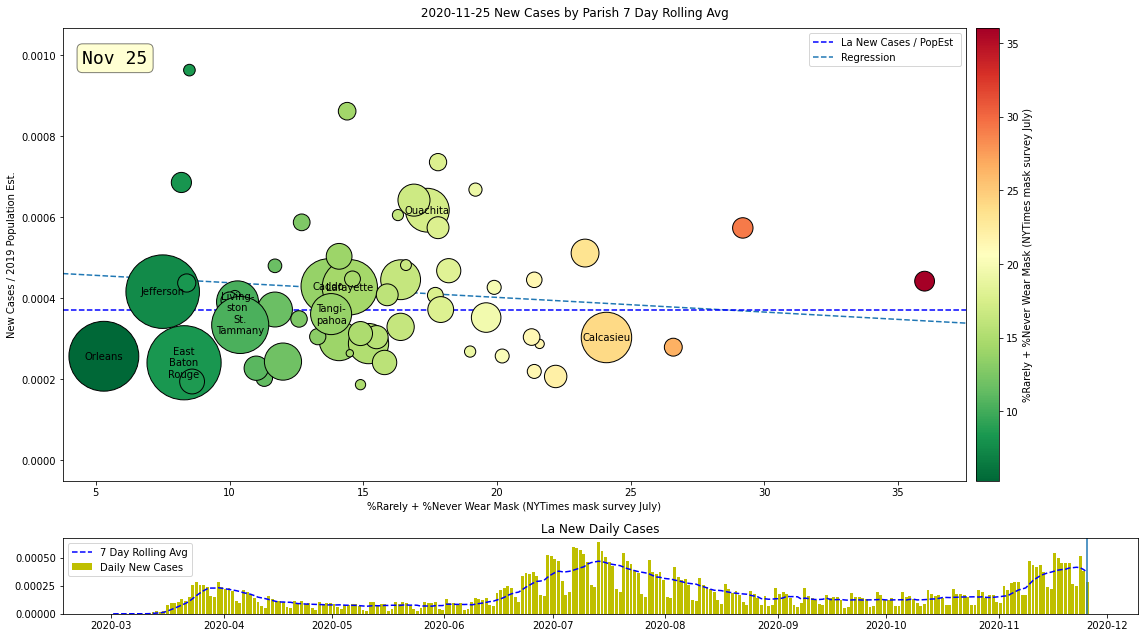

In [12]:
%%time
def plotme(dt, show=True, filename='test.jpg'):
    fig, axs = plt.subplots(2,figsize=(16,9),gridspec_kw={'height_ratios': [6, 1]})
    df = combined_df.loc[dt]
    rollavgnewcases = combined_df.loc[[dt - timedelta(days=t) for t in range(7)]][['Parish','CasesPerCap']].groupby('Parish').mean()
    
    df = df.join(rollavgnewcases,on='Parish',how='left', rsuffix='Rolling')
    scatterplot = axs[0].scatter(df['NoMaskers'], \
                df['CasesPerCapRolling'], \
                c=df['NoMaskers'], \
                cmap='RdYlGn_r', \
                s=df['POPESTIMATE2019']/80, \
                edgecolor='#000000')
    
    for _,data in df.iterrows():
        if data['POPESTIMATE2019'] > 130000:
            axs[0].text(data['NoMaskers'],data['CasesPerCapRolling'], data['Parish'], \
                    ha='center',va='center')
            
            
    axs[0].text(4.5,0.00098,dt.strftime('%b %d').rjust(6), \
             fontsize=18,\
             fontfamily='monospace', \
             bbox=dict(boxstyle='round',facecolor='#ffffa8',alpha=0.5))
    
    fig.suptitle("%s New Cases by Parish 7 Day Rolling Avg" % dt.strftime('%Y-%m-%d').rjust(11) )
    
    axs[0].set_ylabel('New Cases / 2019 Population Est.')
    axs[0].set_xlabel('%Rarely + %Never Wear Mask (NYTimes mask survey July)')
    axs[0].set_xlim((3.7650000000000006, 37.535))
    axs[0].set_ylim((-5.078485687903971e-05, 0.0010664819944598337))
    
    #print(plt.xlim())
    #print(plt.ylim())
    
    X = np.array(axs[0].get_xlim())
    axs[0].plot(X,np.repeat( lanewcases.loc[dt]['NewCaseRoll'],2), zorder=-20 , linestyle='--',color='b', label='La New Cases / PopEst ')
    
    fit = np.polyfit(df['NoMaskers'],df['CasesPerCapRolling'],1)
    axs[0].plot(X, fit[0] * X + fit[1], zorder=-21,linestyle='--', label='Regression')
    
    axs[1].bar(lanewcases.index,lanewcases['Daily Case Count'],color='y', label='Daily New Cases')
    axs[1].plot(lanewcases.index,lanewcases['NewCaseRoll'],color='b', linestyle='--', label='7 Day Rolling Avg')
    axs[1].axvline(dt)
    axs[1].set_title('La New Daily Cases')
    
    axs[0].legend(loc='upper right')
    axs[1].legend()

    fig.colorbar(scatterplot,ax=axs[0],label='%Rarely + %Never Wear Mask (NYTimes mask survey July)',pad=0.01)

    fig.tight_layout()
    
    
    if not show:
        fig.savefig(filename)
        plt.close()
        
    else:
        fig.savefig("MaskUseVidScrShot.jpg")
        
    
plotme(maxdt)

In [13]:
!mkdir movie

mkdir: cannot create directory ‘movie’: File exists


In [14]:
%%time
!rm ./movie/*
framecount = 0
for dt in iterdays(offset=timedelta(days=7)):
    filename= "movie/%s.jpg" % dt.strftime("%Y-%m-%d")
    plotme(dt, show=False, filename=filename)
    framecount += 1
    
!ls movie/ | wc -l

263
CPU times: user 3min 46s, sys: 50.2 s, total: 4min 36s
Wall time: 2min 53s


In [15]:
%%time
moviefile = "MaskUseRatesVideo.mp4"
framerate = int(framecount / 60.0)

!rm $moviefile
!ffmpeg -pattern_type glob -r $framerate -f image2 -i "./movie/*.jpg" -crf 1 $moviefile
#!rm ./movie/*


ffmpeg version 4.1.6 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --disable-decoder=amrnb --disable-decoder=libopenjpeg --disable-libopencv --disable-outdev=sdl2 --disable-podpages --disable-sndio --disable-stripping --enable-libaom --enable-avfilter --enable-avresample --enable-gcrypt --disable-gnutls --enable-openssl --enable-gpl --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libfdk-aac --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libilbc --enable-libkvazaar --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --e

In [16]:
!vlc --fullscreen --loop ./MaskUseRatesVideo.mp4

VLC media player 3.0.11.1 Vetinari (revision 3.0.11.1-0-g52483f3ca2)
[0000563a9378a570] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
libva info: VA-API version 1.4.0
libva info: va_getDriverName() returns 0
libva info: Trying to open /usr/lib/x86_64-linux-gnu/dri/i965_drv_video.so
libva info: Found init function __vaDriverInit_1_4
libva info: va_openDriver() returns 0
[00007f8134c19eb0] avcodec decoder: Using Intel i965 driver for Intel(R) Haswell Mobile - 2.3.0 for hardware decoding
[00007f8134c2b3b0] avcodec decoder: Using Intel i965 driver for Intel(R) Haswell Mobile - 2.3.0 for hardware decoding
QObject::~QObject: Timers cannot be stopped from another thread


In [17]:
#title for youtube
youtube_title = "[%s] Louisiana New Covid19 Cases per Capita vs Mask Usage" % maxdt.strftime("%b %d")

print(youtube_title)

[Nov 25] Louisiana New Covid19 Cases per Capita vs Mask Usage


In [18]:
youtube_description = """Updated:  %s
This video compares Covid19 daily new case rates for parishes in Louisiana (data from LaDH) to the results of a survey on how frequently masks are worn (data from NYTimes).

The purpose of this project is to be interesting, and to show off some data processing capabilities.  This project should not be used to draw conclusion about the spread of Covid19, the effectiveness of masks, or anything really.

If you are drawing conclusion other then, "Wow, that's a neat graph", then you have made a mistake.

Project page:  https://github.com/GarysCorner/Covid19-LaCompared

""" % maxdt.strftime("%b %d, %Y")

print(youtube_description)

Updated:  Nov 25, 2020
This video compares Covid19 daily new case rates for parishes in Louisiana (data from LaDH) to the results of a survey on how frequently masks are worn (data from NYTimes).

The purpose of this project is to be interesting, and to show off some data processing capabilities.  This project should not be used to draw conclusion about the spread of Covid19, the effectiveness of masks, or anything really.

If you are drawing conclusion other then, "Wow, that's a neat graph", then you have made a mistake.

Project page:  https://github.com/GarysCorner/Covid19-LaCompared


